# EDA Titanic Equipo 4

Edgar Castillo Ramírez A00827826

Roel De la Rosa Castillo A01197595

Rodrigo Montelongo Pinales A00827757

Juan Pablo Yáñez González	A00829598		

Héctor San Román Caraza	A01422876

In [132]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns

from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/Shareddrives/Equipo 4 AI/ProyectoTitanic"
titanic = pd.read_csv('train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Shareddrives/Equipo 4 AI/ProyectoTitanic


# Identificación de variables y clasificación

Lo primero que se debe explorar es la parte de las variables para saber con qué se está trabajando. Para esto se utilizará el siguiente código.

In [133]:
#Primeras filas del dataframe
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
#Columnas del dataframe
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [135]:
#Tipo de datos que maneja cada columna
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Se tienen un total de 12 variables. Si se clasifican en cuantitativas y cualitativas se obtiene la siguiente lista:

###Cuantitativas
* PassengerId
* Age
* Fare

###Cualitativas
* Survived
* Pclass
* Name
* Sex
* SibSp
* Parch
* Ticket
* Cabin
* Embarked

#Análisis de datos

In [136]:
#Para visualizar algunas medidas importantes
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [137]:
#Valores faltantes
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [138]:
#Valores duplicados
titanic.duplicated().sum()

0

Después de analizar los datos, se ha decido retirar algunas de las variables que contiene originalmente el dataframe:

* PassengerId: No aporta mucha información ya que es un índice para contar los registros. Esta función ya la cumple el índice del dataframe.

* Ticket: Se considera que la información que nos puede brindar este dato podría ser la ubicación en la que los pasajeros se encontraban, pero resulta innecesario ya que esto mismo nos lo especifica la variable pclass (Se sabe que los pasajeros tenían sus habitaciones y espacios asignados según la clase).

* Cabin: Cuenta con una gran cantidad de datos faltantes (687 registros, aproximadamente 78%) y la información que nos puede brindar puede ser de igual manera que el Ticket, la ubicación de los pasajeros. Se seguirá tomando pclass. Después de investigar brevemente, esta variable ha sido objetivo de discusión pues no se ha encontrado mucha información sobre esto.

* Name: Se identificó que los nombres en el dataframe contienen un título como Mr, Mrs, Miss, entre otros. Sin embargo, para saber el sexo y edad de una persona ya se tienen variables específicas. En caso de que se separase el nombre por títulos, nos terminaría dando la misma información que dichas variables.

La variable Age, que cuenta con 177 valores faltantes, se plantea realizar una predicción de los datos faltantes para completar los datos.

In [139]:
titanic.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)
num_cols = titanic.select_dtypes(include="number").columns
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## ¿Qué tenemos como datos?

### Survived

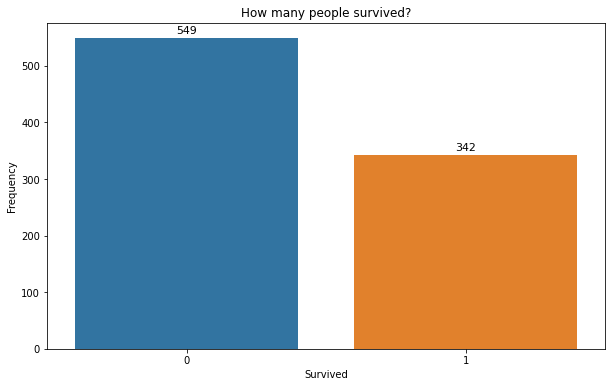

In [140]:
plt.figure(figsize=(10,6))
bp = sns.countplot(x = 'Survived', data = titanic)
bp.set(title="How many people survived?", xlabel='Survived', ylabel='Frequency')
for bar in bp.patches:
    bp.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

Se observa que la la mayoría de los pasajeros no sobrevivieron al incidente.

### Pclass

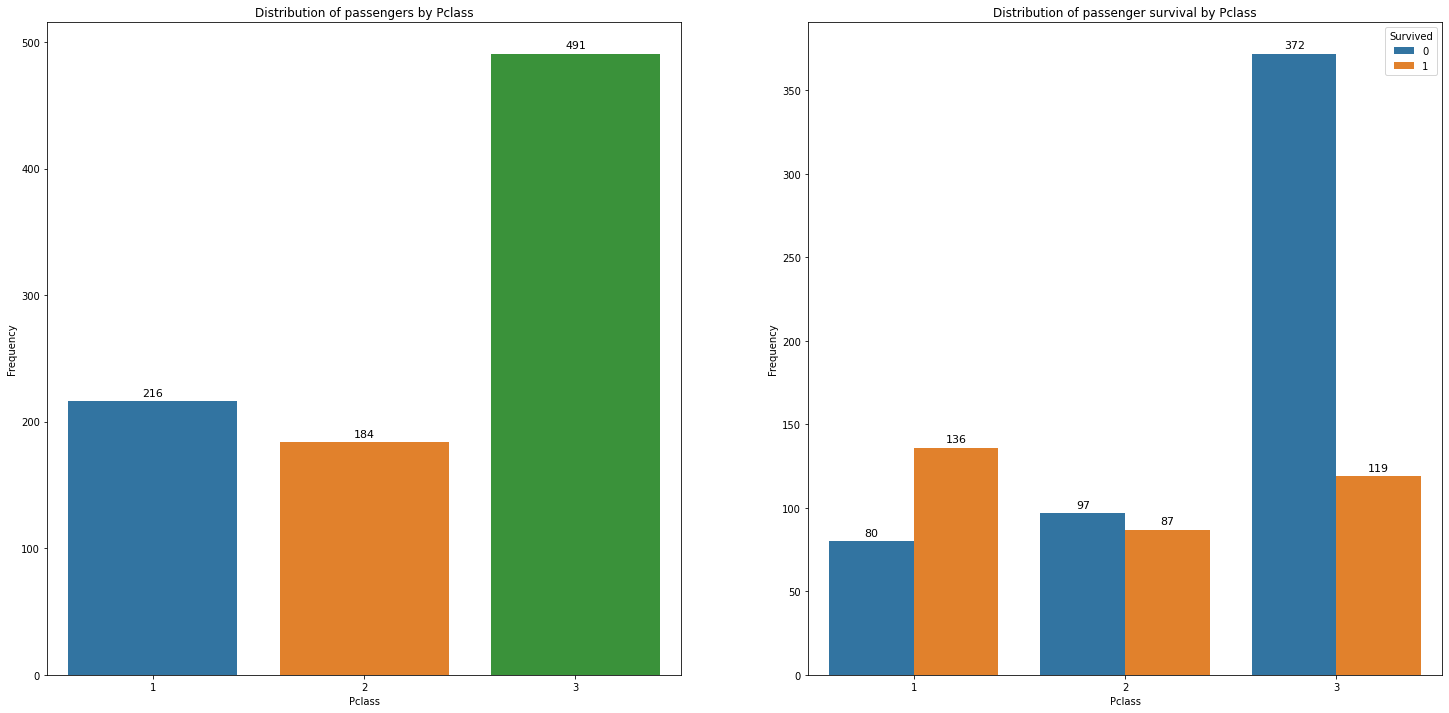

In [141]:
fig, ax = plt.subplots(ncols=2,figsize=(25,12))
bp1 = sns.countplot(x = 'Pclass', data = titanic, ax=ax[0])
bp1.set(title = "Distribution of passengers by Pclass", xlabel = "Pclass", ylabel = "Frequency")
for bar in bp1.patches:
        bp1.annotate(format(bar.get_height()),
                      (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                      size=11, xytext=(0, 8),
                      textcoords='offset points')
bp2 = sns.countplot(x = 'Pclass', data = titanic, hue="Survived", ax=ax[1])
bp2.set(title = "Distribution of passenger survival by Pclass", xlabel = "Pclass", ylabel = "Frequency")
for bar in bp2.patches:
  bp2.annotate(format(bar.get_height()),
                (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                size=11, xytext=(0, 8),
                textcoords='offset points')

Se puede ver que en su mayoría, los pasajeros eran miembros de la tercera clase. Será interesante visualizar, por ejemplo, cuántas personas de cada clase sobrevivieron.

### Sex

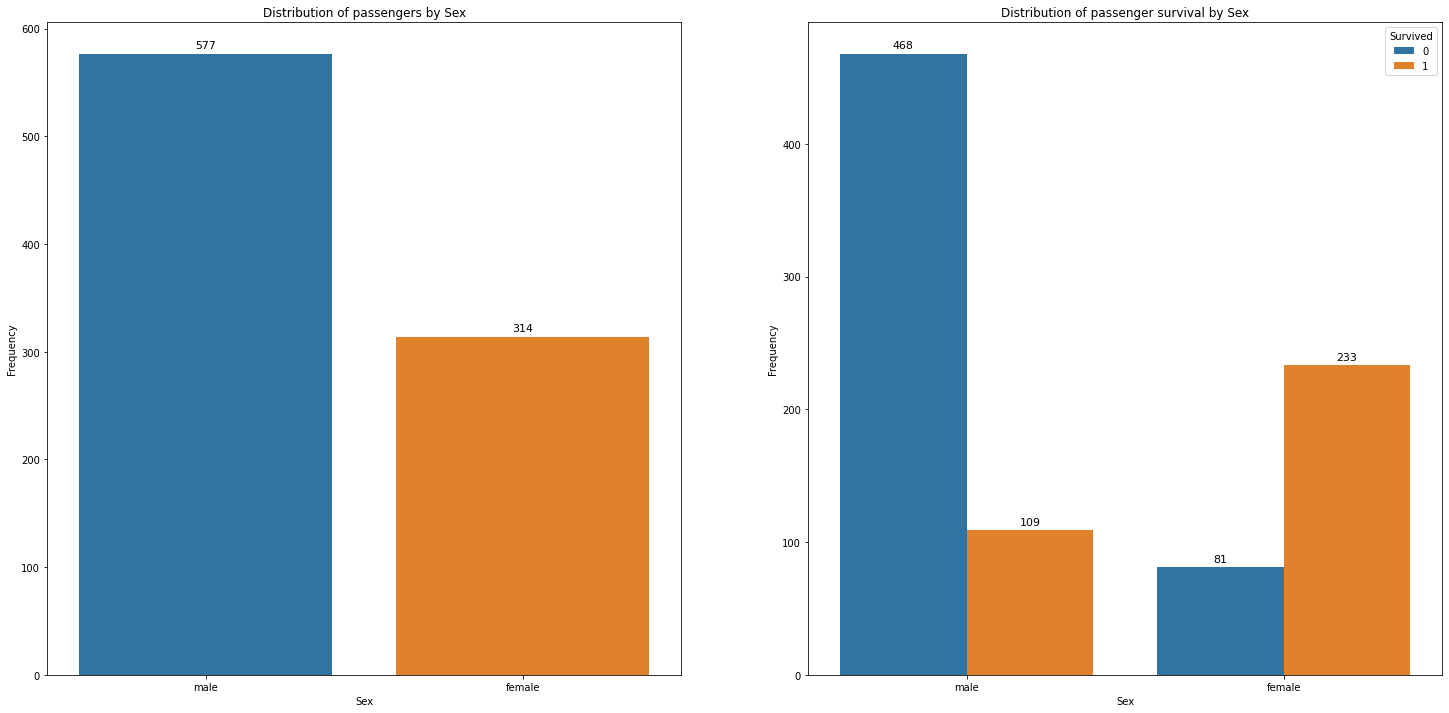

In [142]:
fig, ax = plt.subplots(ncols=2,figsize=(25,12))
bp1 = sns.countplot(x = 'Sex', data = titanic, ax=ax[0])
bp1.set(title = "Distribution of passengers by Sex", xlabel = "Sex", ylabel = "Frequency")
for bar in bp1.patches:
        bp1.annotate(format(bar.get_height()),
                      (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                      size=11, xytext=(0, 8),
                      textcoords='offset points')
bp2 = sns.countplot(x = 'Sex', data = titanic, hue="Survived", ax=ax[1])
bp2.set(title = "Distribution of passenger survival by Sex", xlabel = "Sex", ylabel = "Frequency")
for bar in bp2.patches:
  bp2.annotate(format(bar.get_height()),
                (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                size=11, xytext=(0, 8),
                textcoords='offset points')

La mayoría de los pasajeros eran hombres.

### Age

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

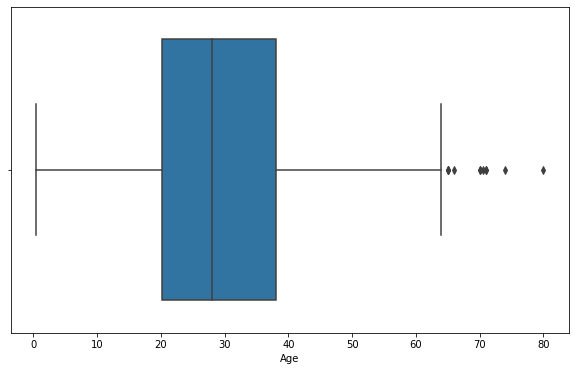

In [143]:
plt.figure(figsize=(10,6))
bp = sns.boxplot(x=titanic["Age"])
titanic["Age"].describe()

Una gran cantidad de los pasajeros se encuentran debajo de los 40 años, se tienen algunos valores atípicos que deberán ser interpretados y manejados.

### SibSp

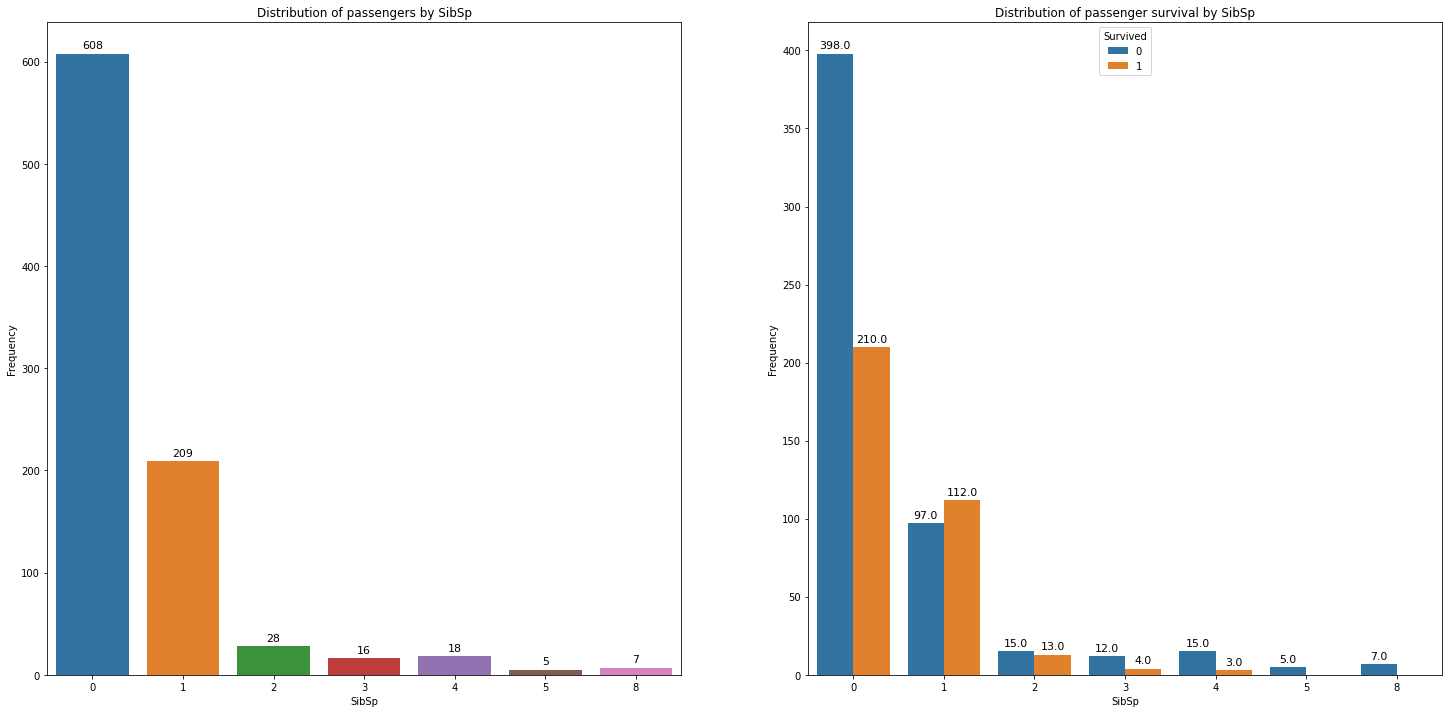

In [144]:
fig, ax = plt.subplots(ncols=2,figsize=(25,12))
bp1 = sns.countplot(x = 'SibSp', data = titanic, ax=ax[0])
bp1.set(title = "Distribution of passengers by SibSp", xlabel = "SibSp", ylabel = "Frequency")
for bar in bp1.patches:
        bp1.annotate(format(bar.get_height()),
                      (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                      size=11, xytext=(0, 8),
                      textcoords='offset points')
bp2 = sns.countplot(x = 'SibSp', data = titanic, hue="Survived", ax=ax[1])
bp2.set(title = "Distribution of passenger survival by SibSp", xlabel = "SibSp", ylabel = "Frequency")
for bar in bp2.patches:
  bp2.annotate(format(bar.get_height()),
                (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                size=11, xytext=(0, 8),
                textcoords='offset points')

Se puede ver que en su mayoría, no había personas con hermanos o esposas en el barco.

### Parch

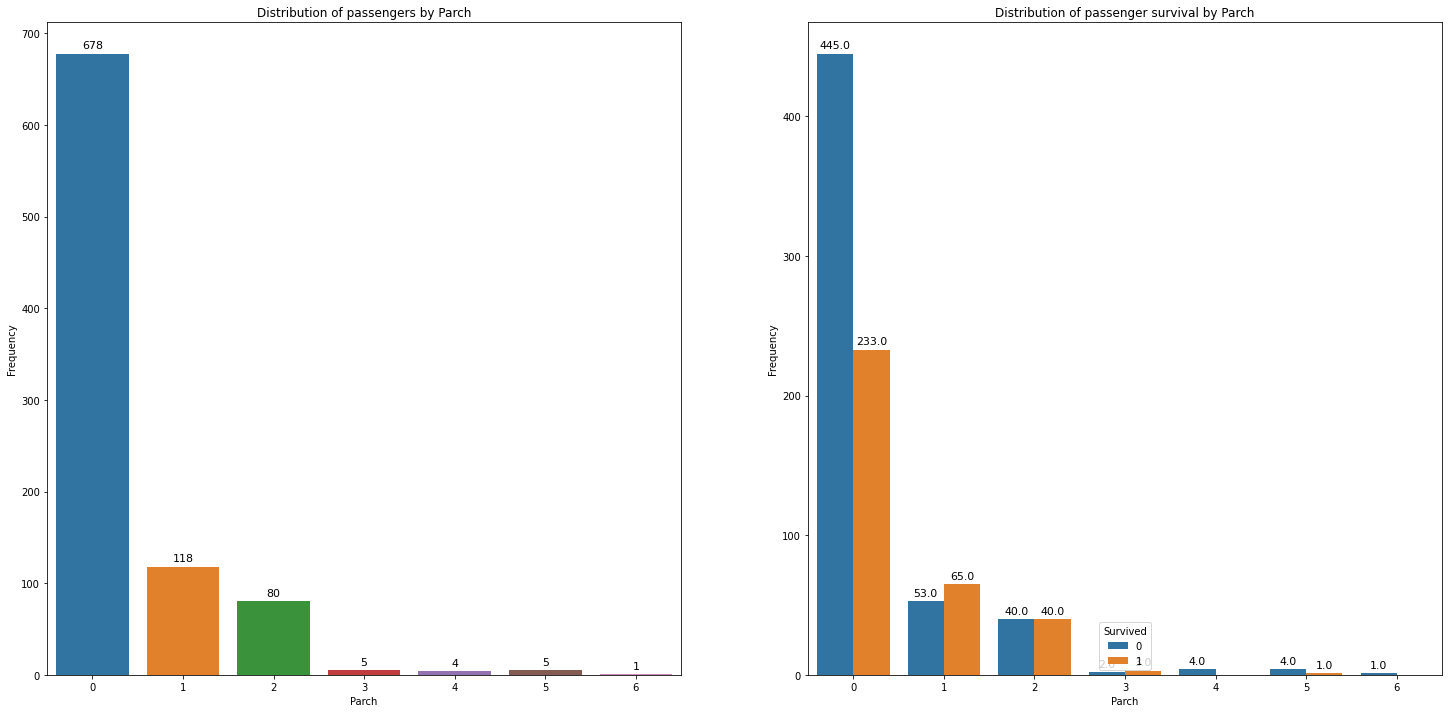

In [145]:
fig, ax = plt.subplots(ncols=2,figsize=(25,12))
bp1 = sns.countplot(x = 'Parch', data = titanic, ax=ax[0])
bp1.set(title = "Distribution of passengers by Parch", xlabel = "Parch", ylabel = "Frequency")
for bar in bp1.patches:
        bp1.annotate(format(bar.get_height()),
                      (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                      size=11, xytext=(0, 8),
                      textcoords='offset points')
bp2 = sns.countplot(x = 'Parch', data = titanic, hue="Survived", ax=ax[1])
bp2.set(title = "Distribution of passenger survival by Parch", xlabel = "Parch", ylabel = "Frequency")
for bar in bp2.patches:
  bp2.annotate(format(bar.get_height()),
                (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                size=11, xytext=(0, 8),
                textcoords='offset points')

Gran parte de los pasajeros no eran padres e hijos.

### Fare

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

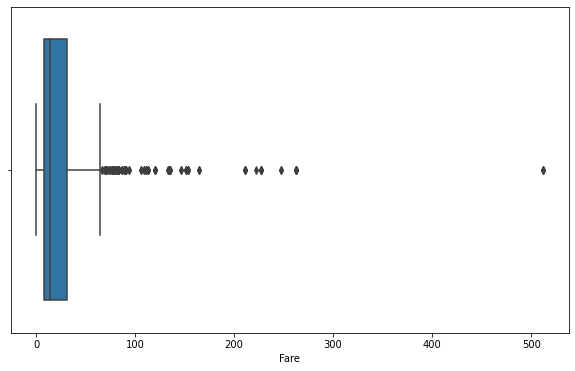

In [146]:
plt.figure(figsize=(10,6))
bp = sns.boxplot(x=titanic["Fare"])
titanic["Fare"].describe()

En este caso se puede observar que los boletos del Titanic no costaban (en su tiempo) un precio mayor a 100 dólares en su mayoría. Sin embargo, hay valores atípicos, como la persona que pagó 512 unidades. Puede estar sesgada esta gráfica, ya que aparecen valores en 0. No se sabría si son valores incorrectos o tal vez se refieran a los boletos de los niños.

### Embarked

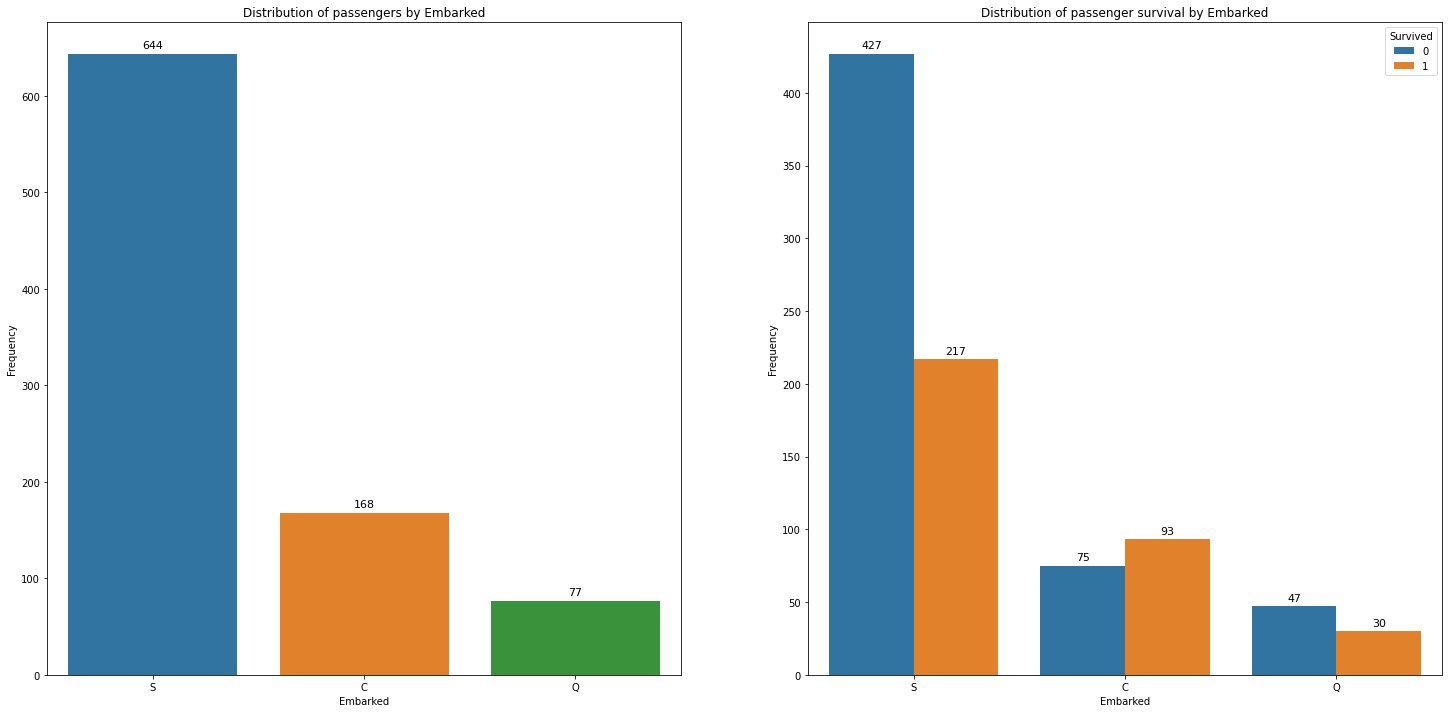

In [147]:
fig, ax = plt.subplots(ncols=2,figsize=(25,12))
bp1 = sns.countplot(x = 'Embarked', data = titanic, ax=ax[0])
bp1.set(title = "Distribution of passengers by Embarked", xlabel = "Embarked", ylabel = "Frequency")
for bar in bp1.patches:
        bp1.annotate(format(bar.get_height()),
                      (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                      size=11, xytext=(0, 8),
                      textcoords='offset points')
bp2 = sns.countplot(x = 'Embarked', data = titanic, hue="Survived", ax=ax[1])
bp2.set(title = "Distribution of passenger survival by Embarked", xlabel = "Embarked", ylabel = "Frequency")
for bar in bp2.patches:
  bp2.annotate(format(bar.get_height()),
                (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                size=11, xytext=(0, 8),
                textcoords='offset points')

Se puede observar que gran parte de los pasajeros eran provenientes de Southampton, posteriormente Cherburgo y finalmente Queenstown. Esto tiene una explicación lógica, ya que el puesto de abordaje inicial fue Southampton, después tuvo una escala en Cherburgo y finalmente en Queenstown.

## Limpieza de datos

Primeramente, es importante generar algunas variables para tener un mejor entendimiento y manejo de los datos:

* Ischild: Esta variable nos ayudará a saber si una persona es menor de edad o no.

* Family: Esta variable apoyará para la cantidad de familiares que se tenían en el barco.

In [148]:
cleanDf = titanic
cleanDf['Is_child'] = 0
for i in range(cleanDf.shape[0]):
    if cleanDf['Age'].iloc[i] < 18:
        cleanDf['Is_child'].iloc[i] = 1
    else:
        cleanDf['Is_child'].iloc[i] = 0

cleanDf['Family'] = cleanDf['SibSp'] + cleanDf['Parch']
cleanDf['Family'].loc[cleanDf['Family'] > 0] = 1
cleanDf['Family'].loc[cleanDf['Family'] == 0] = 0
cleanDf = cleanDf.drop(['SibSp', 'Parch'], axis = 1)
cleanDf.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Survived,Pclass,Sex,Age,Fare,Embarked,Is_child,Family
0,0,3,male,22.0,7.2500,S,0,1
1,1,1,female,38.0,71.2833,C,0,1
2,1,3,female,26.0,7.9250,S,0,0
3,1,1,female,35.0,53.1000,S,0,1
4,0,3,male,35.0,8.0500,S,0,0


Además, se tienen que transformar las variables de Sex y Embarked a numéricas.

In [149]:
dummies = pd.get_dummies(cleanDf['Sex'])
cleanDf = cleanDf.join(dummies)
cleanDf = cleanDf.drop(['Sex'], axis = 1)
cleanDf.head()

,Survived,Pclass,Age,Fare,Embarked,Is_child,Family,female,male
0,0,3,22.0,7.2500,S,0,1,0,1
1,1,1,38.0,71.2833,C,0,1,1,0
2,1,3,26.0,7.9250,S,0,0,1,0
3,1,1,35.0,53.1000,S,0,1,1,0
4,0,3,35.0,8.0500,S,0,0,0,1


In [150]:
dummies_port = pd.get_dummies(cleanDf['Embarked'])
cleanDf = cleanDf.join(dummies_port)
cleanDf = cleanDf.drop(['Embarked'], axis = 1)
cleanDf.head()

,Survived,Pclass,Age,Fare,Is_child,Family,female,male,C,Q,S
0,0,3,22.0,7.2500,0,1,0,1,0,0,1
1,1,1,38.0,71.2833,0,1,1,0,1,0,0
2,1,3,26.0,7.9250,0,0,1,0,0,0,1
3,1,1,35.0,53.1000,0,1,1,0,0,0,1
4,0,3,35.0,8.0500,0,0,0,1,0,0,1


Hay que recordar que había valores faltantes en Age(177) y Embarked (2). A continuación serán manejadas ambas situaciones.

In [153]:
#Modelo de predicción para edad

#Embarked podría ser un promedio, no son muchos valores, de 891 solamente faltan 2.

También es necesario eliminar los Outliers de las variables cuantitativas.

In [ ]:
#Age
#Con Q3-1.5*ri (Lower) y Q3+1.5*ri (Upper)

#Fare

## Hipótesis

* ¿Influyó la clase de los pasajeros para su supervivencia? ¿Cómo fue la supervivencia por sexo según la clase?

* ¿Influyó la edad para la supervivencia de los pasajeros? ¿Cómo fue la supervivencia por sexo según la edad?

* ¿Si una persona pagó más para abordar, sus chances de sobrevivir aumentaron? ¿Influye el sexo?

* ¿Ser menor aumenta la posibilidad de sobrevivir? ¿Influye el sexo?

* ¿Tener familia aumenta la posibilidad de sobrevivir? ¿Influye el sexo?

* ¿Si embarqué en alguna ciudad tenía más probabilidad de sobrevivir que en otra? ¿Influye el sexo?